<a href="https://colab.research.google.com/github/dip-prog/dip-07/blob/master/ISIC_Alexnet_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download wanderdust/skin-lesion-analysis-toward-melanoma-detection

100% 11.3G/11.3G [06:55<00:00, 25.2MB/s]
100% 11.3G/11.3G [06:55<00:00, 29.2MB/s]


In [7]:
!unzip /content/skin-lesion-analysis-toward-melanoma-detection.zip

Archive:  /content/skin-lesion-analysis-toward-melanoma-detection.zip
  inflating: skin-lesions/test/melanoma/ISIC_0012258.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012356.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012369.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012395.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012425.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012758.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012989.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013072.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013073.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013242.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013277.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013321.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013374.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013411.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013414.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_

In [8]:
IMAGE_SIZE=[224,224]
train_path='/content/skin-lesions/train'
valid_path='/content/skin-lesions/valid'
test_path='/content/skin-lesions/test'

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

In [10]:
train_dataGenerator = ImageDataGenerator(rescale = 1./255,
                                        shear_range = 0.2,
                                        zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         fill_mode="nearest"
                                        )

validation_dataGenerator = ImageDataGenerator(rescale = 1./255)


In [11]:
batch_size=16

In [12]:
trainDatasets = train_dataGenerator.flow_from_directory(train_path,
                                                       target_size=(224, 224),
                                                       batch_size=batch_size,
                                                       class_mode="categorical")

validationDatasets = validation_dataGenerator.flow_from_directory(valid_path,
                                                       target_size=(224, 224),
                                                       batch_size=batch_size,
                                                       class_mode="categorical")

Found 2000 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [13]:
classInformation = trainDatasets.class_indices
print("Class Information: {}".format(classInformation))
classes = list(classInformation)
print("Class Names: {}".format(classes))

Class Information: {'melanoma': 0, 'nevus': 1, 'seborrheic_keratosis': 2}
Class Names: ['melanoma', 'nevus', 'seborrheic_keratosis']


In [14]:
classSamplesT = trainDatasets.samples
print("Training Data Samples: {}".format(classSamplesT))
classSamplesV = validationDatasets.samples
print("Validation Data Samples: {}".format(classSamplesV))


Training Data Samples: 2000
Validation Data Samples: 150


In [15]:
weightPath = "best_weights_9.hdf5"
checkPoint = ModelCheckpoint(weightPath, monitor="val_acc", verbose = 1, save_best_only = True, save_weghts_only = True, mode = "max")
callBacksList = [checkPoint]

In [16]:
model = Sequential()

# Conv 01 Layer
model.add(Convolution2D(96, 11,padding = "valid",strides =(4, 4),input_shape = (224, 224, 3),activation = "relu"))

model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())



# Conv 02 Layer
model.add(Convolution2D(256, 5,padding = "valid",strides =(1, 1),activation = "relu"))

model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())
# Conv 03 Layer
model.add(Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(BatchNormalization())


# Conv 04 Layer
model.add(Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(BatchNormalization())



# Conv 05 Layer
model.add(Convolution2D(256, 3,padding = "valid",strides =(1, 1),activation = "relu"))

model.add(MaxPooling2D(pool_size = (3, 3),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())


# Flatten Layer
model.add(Flatten())
# Dense 01
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Dense 02
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Dense 03
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Final Layer
model.add(Dense(3, activation="softmax"))

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

In [18]:
model.compile(tf.keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.9, decay = 0.005),
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [19]:
history = model.fit(trainDatasets,
                   steps_per_epoch = classSamplesT//batch_size,
                   validation_data=validationDatasets,
                   epochs=20,
                   validation_steps=classSamplesV//batch_size,
                   callbacks=callBacksList)


Epoch 1/20
125/125 [==============================] - ETA: 0s - loss: 1.4227 - accuracy: 0.4290

125/125 [==============================] - 422s 3s/step - loss: 1.4227 - accuracy: 0.4290 - val_loss: 1.0771 - val_accuracy: 0.5069
Epoch 2/20
125/125 [==============================] - ETA: 0s - loss: 1.0857 - accuracy: 0.5055

125/125 [==============================] - 439s 4s/step - loss: 1.0857 - accuracy: 0.5055 - val_loss: 1.0474 - val_accuracy: 0.5278
Epoch 3/20
125/125 [==============================] - ETA: 0s - loss: 0.9706 - accuracy: 0.5795

125/125 [==============================] - 414s 3s/step - loss: 0.9706 - accuracy: 0.5795 - val_loss: 0.9794 - val_accuracy: 0.5417
Epoch 4/20
125/125 [==============================] - ETA: 0s - loss: 0.9355 - accuracy: 0.6050

125/125 [==============================] - 409s 3s/step - loss: 0.9355 - accuracy: 0.6050 - val_loss: 1.0405 - val_accuracy: 0.5347
Epoch 5/20
125/125 [==============================] - ETA: 0s - loss: 0.9059 - accuracy: 0.6110

125/125 [==============================] - 449s 4s/step - loss: 0.9059 - accuracy: 0.6110 - val_loss: 1.0156 - val_accuracy: 0.5417
Epoch 6/20
125/125 [==============================] - ETA: 0s - loss: 0.8880 - accuracy: 0.6260

125/125 [==============================] - 407s 3s/step - loss: 0.8880 - accuracy: 0.6260 - val_loss: 0.9607 - val_accuracy: 0.5625
Epoch 7/20
125/125 [==============================] - ETA: 0s - loss: 0.9097 - accuracy: 0.6395

125/125 [==============================] - 406s 3s/step - loss: 0.9097 - accuracy: 0.6395 - val_loss: 0.9593 - val_accuracy: 0.5556
Epoch 8/20
125/125 [==============================] - ETA: 0s - loss: 0.8748 - accuracy: 0.6390

125/125 [==============================] - 407s 3s/step - loss: 0.8748 - accuracy: 0.6390 - val_loss: 1.0247 - val_accuracy: 0.5417
Epoch 9/20
125/125 [==============================] - ETA: 0s - loss: 0.8957 - accuracy: 0.6345

125/125 [==============================] - 410s 3s/step - loss: 0.8957 - accuracy: 0.6345 - val_loss: 1.0206 - val_accuracy: 0.5347
Epoch 10/20
125/125 [==============================] - ETA: 0s - loss: 0.8761 - accuracy: 0.6355

125/125 [==============================] - 406s 3s/step - loss: 0.8761 - accuracy: 0.6355 - val_loss: 0.9849 - val_accuracy: 0.5625
Epoch 11/20
125/125 [==============================] - ETA: 0s - loss: 0.8656 - accuracy: 0.6425

125/125 [==============================] - 410s 3s/step - loss: 0.8656 - accuracy: 0.6425 - val_loss: 1.0171 - val_accuracy: 0.5625
Epoch 12/20
125/125 [==============================] - ETA: 0s - loss: 0.8759 - accuracy: 0.6440

125/125 [==============================] - 436s 4s/step - loss: 0.8759 - accuracy: 0.6440 - val_loss: 0.9995 - val_accuracy: 0.5556
Epoch 13/20
125/125 [==============================] - ETA: 0s - loss: 0.8534 - accuracy: 0.6485

125/125 [==============================] - 399s 3s/step - loss: 0.8534 - accuracy: 0.6485 - val_loss: 1.0097 - val_accuracy: 0.5278
Epoch 14/20
125/125 [==============================] - ETA: 0s - loss: 0.8446 - accuracy: 0.6485

125/125 [==============================] - 437s 3s/step - loss: 0.8446 - accuracy: 0.6485 - val_loss: 0.9836 - val_accuracy: 0.5556
Epoch 15/20
125/125 [==============================] - ETA: 0s - loss: 0.8609 - accuracy: 0.6585

125/125 [==============================] - 406s 3s/step - loss: 0.8609 - accuracy: 0.6585 - val_loss: 0.9916 - val_accuracy: 0.5347
Epoch 16/20
125/125 [==============================] - ETA: 0s - loss: 0.8576 - accuracy: 0.6510

125/125 [==============================] - 410s 3s/step - loss: 0.8576 - accuracy: 0.6510 - val_loss: 0.9975 - val_accuracy: 0.5486
Epoch 17/20
125/125 [==============================] - ETA: 0s - loss: 0.8454 - accuracy: 0.6605

125/125 [==============================] - 410s 3s/step - loss: 0.8454 - accuracy: 0.6605 - val_loss: 0.9312 - val_accuracy: 0.5625
Epoch 18/20
125/125 [==============================] - ETA: 0s - loss: 0.8562 - accuracy: 0.6570

125/125 [==============================] - 411s 3s/step - loss: 0.8562 - accuracy: 0.6570 - val_loss: 0.9798 - val_accuracy: 0.5486
Epoch 19/20
125/125 [==============================] - ETA: 0s - loss: 0.8451 - accuracy: 0.6590

125/125 [==============================] - 440s 4s/step - loss: 0.8451 - accuracy: 0.6590 - val_loss: 0.9758 - val_accuracy: 0.5556
Epoch 20/20
125/125 [==============================] - ETA: 0s - loss: 0.8387 - accuracy: 0.6555

125/125 [==============================] - 408s 3s/step - loss: 0.8387 - accuracy: 0.6555 - val_loss: 0.9471 - val_accuracy: 0.5417


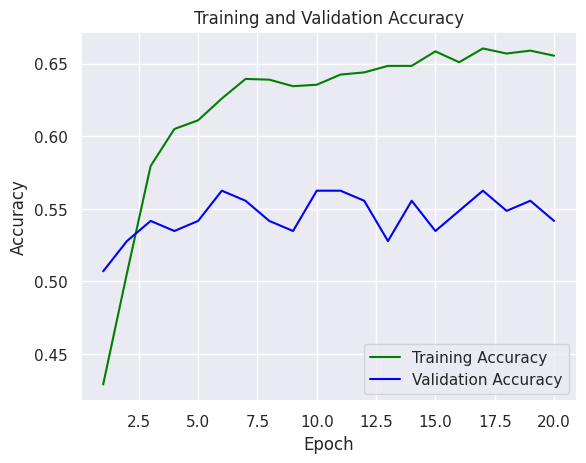

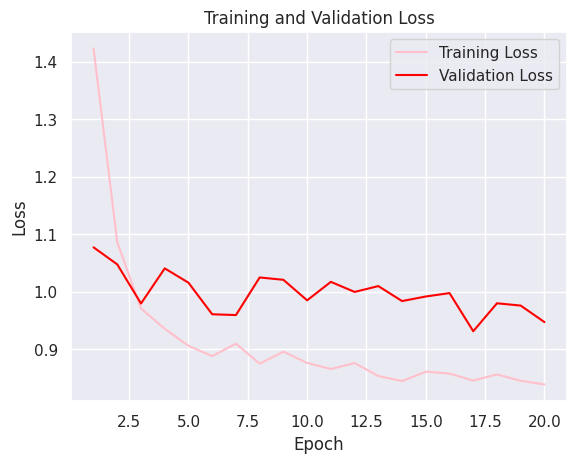

In [20]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()